# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/emorywise/Desktop/DS3001 Data/pierce_county_house_sales.csv')
print(df.head(),'\n')
print(df.describe(),'\n')

    sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0  2020-01-02      380000               2157                           0   
1  2020-01-02      383000               2238                           0   
2  2020-01-01      419900               1452                           0   
3  2020-01-02      251660                832                           0   
4  2020-01-02      500000               1780                           0   

   basement_square_feet  attached_garage_square_feet  \
0                     0                          528   
1                     0                          396   
2                     0                            0   
3                     0                            0   
4                   384                          484   

   detached_garage_square_feet  fireplaces        hvac_description  \
0                            0           0  Warm and Cool Air Zone   
1                            0           0              Forced Air

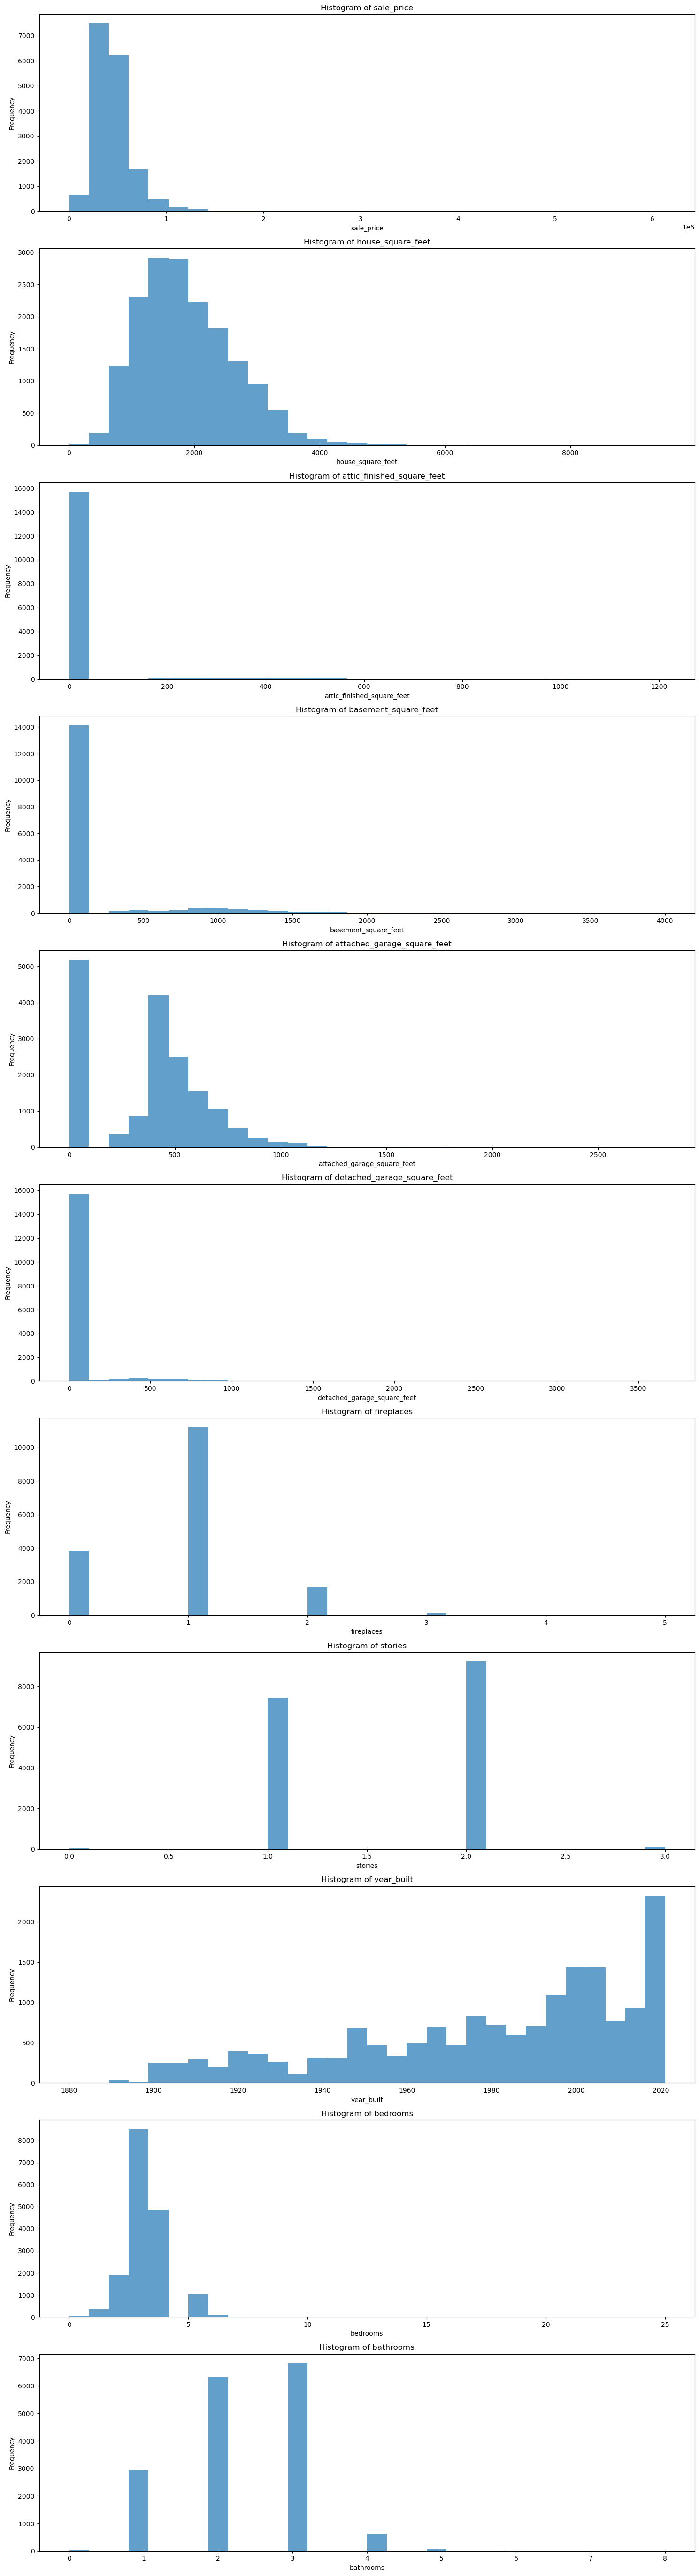

In [8]:
numeric_data = df.select_dtypes(include=['number'])

# Set up the number of plots
num_cols = len(numeric_data.columns)
plt.figure(figsize=(15, 5 * num_cols))

for i, column in enumerate(numeric_data.columns):
    plt.subplot(num_cols, 1, i + 1)
    plt.hist(numeric_data[column], bins=30, alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency') 

plt.tight_layout() 
plt.show() 

In [10]:
print(df.dtypes)

sale_date                      object
sale_price                      int64
house_square_feet               int64
attic_finished_square_feet      int64
basement_square_feet            int64
attached_garage_square_feet     int64
detached_garage_square_feet     int64
fireplaces                      int64
hvac_description               object
exterior                       object
interior                       object
stories                         int64
roof_cover                     object
year_built                      int64
bedrooms                        int64
bathrooms                       int64
waterfront_type                object
view_quality                   object
utility_sewer                  object
dtype: object


In [28]:
data_encoded = pd.get_dummies(df, columns=['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer'], drop_first=True)

In [31]:
print(df['waterfront_type'].unique())
print(df['view_quality'].unique())

[nan 'WF Lake' 'WF Salt' 'WF Stream/Creek' 'WF River']
[nan 'View Avg' 'View Lim -' 'View Lim' 'View Good' 'View Avg +'
 'View Lim +' 'View V-Good' 'View Good +']


In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [39]:
# Model 1
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = df['sale_price']
X = df.loc[:,['house_square_feet', 'bedrooms', 'bathrooms', ] ]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.2579153684914416
RMSE:  234838.05139577712


,variable,coefficient
0,house_square_feet,159.224876
1,bedrooms,8442.227860
2,bathrooms,51194.892779


In [40]:
# Model 2
y = df['sale_price']
X = df.loc[:,['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet',
              'attached_garage_square_feet', 'detached_garage_square_feet'] ]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.35647926030156385
RMSE:  218687.02847123414


,variable,coefficient
0,house_square_feet,196.387914
1,attic_finished_square_feet,251.523203
2,basement_square_feet,162.846437
3,attached_garage_square_feet,99.332420
4,detached_garage_square_feet,148.597917


The second model seems to work better based on Rsq and RMSE.

In [44]:
df['square_feet_stories_interaction'] = df['house_square_feet'] * df['stories']
df['bedrooms_square_feet_interaction'] = df['bedrooms'] * df['house_square_feet']

y = df['sale_price']
X = df.loc[:,['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet',
              'attached_garage_square_feet', 'detached_garage_square_feet', 
              'square_feet_stories_interaction', 'bedrooms_square_feet_interaction'] ]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.4011468369298655
RMSE:  210960.87749576906


,variable,coefficient
0,house_square_feet,323.774177
1,attic_finished_square_feet,194.018843
2,basement_square_feet,152.981648
3,attached_garage_square_feet,77.334568
4,detached_garage_square_feet,109.412913
5,square_feet_stories_interaction,-26.113396
6,bedrooms_square_feet_interaction,-20.558584


The more complex model is slightly better than the second simple model I created.

This lab has helped to teach me that there is a lot more to model selection that simply getting a high R squared or low RMSE. For example, I believe that my first model, which had just house_square_feet, bedrooms, and bathrooms would actually be a better predictor of house price than my other models simply based off of what I know about the world. However, my other two models had a higher R squared and lower RMSE. This can be explained by the addition of several more variables to the model, which may lead to overfitting.

In [49]:
# Disclaimer: I used ChatGPT to help me through this question, and it looks like ChatGPT did this horribly wrong
#             somehow because the R-squared is -2.5, which makes no sense to me.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(X_train, y_train)

y_hat = lasso.predict(X_test)

rsq = lasso.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

print('R-squared:', rsq)
print('RMSE:', rmse)

results = pd.DataFrame({'variable': X.columns, 'coefficient': lasso.coef_})
print(results)

R-squared: -2.5068261503775076
RMSE: 510503.66881948384
                           variable    coefficient
0                 house_square_feet  195078.682535
1        attic_finished_square_feet   15777.961575
2              basement_square_feet   61704.549596
3       attached_garage_square_feet   24671.990917
4       detached_garage_square_feet   18168.358476
5   square_feet_stories_interaction  -31520.969365
6  bedrooms_square_feet_interaction  -64655.134108
